<a href="https://colab.research.google.com/github/paulohenriquesilva3m/paulohenriquesilva3m/blob/main/modelo_regress%C3%A3o_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importando as bibliotecas e os dados


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

MKT = pd.read_csv('/content/MKT (1).csv')

# Visualização inicial dos dados

MKT.head(10)

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


In [9]:
# Informações iniciais dos dados

MKT.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [10]:
# Descrição dos dados

MKT.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


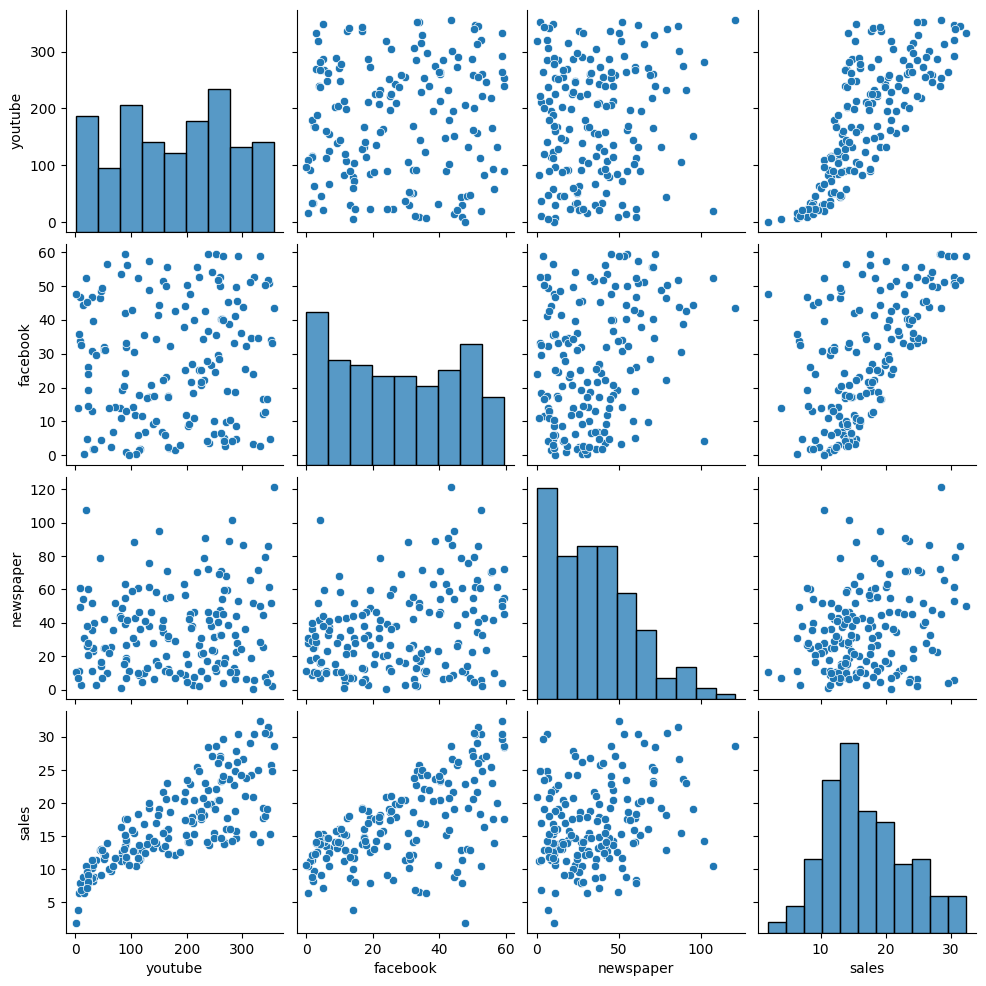

In [23]:
# Gráficos de análises gerais e relações entre as variáveis

sns.pairplot(MKT);

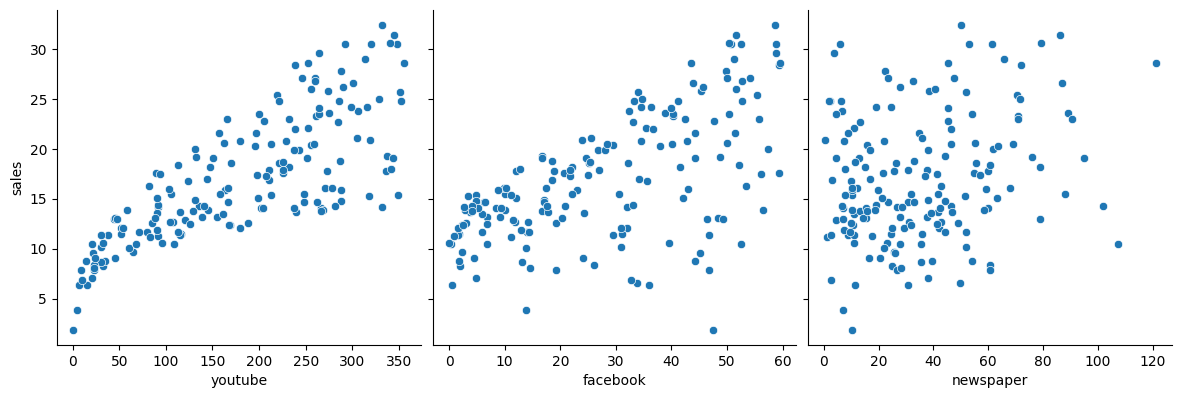

In [12]:
# Análise do comportamento dos dados em função do investimento por plataforma de divulgação

sns.pairplot(MKT, x_vars=['youtube','facebook','newspaper'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

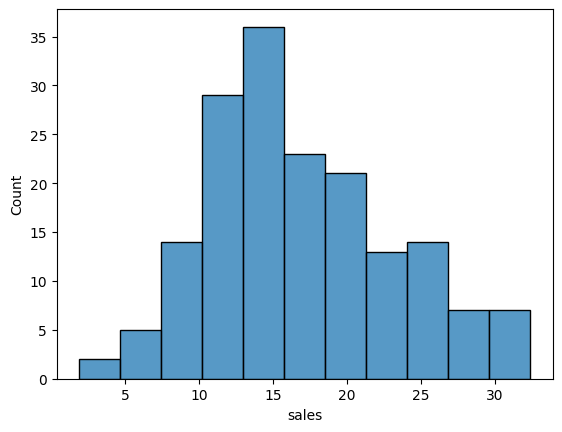

In [24]:
# Histograma de vendas

sns.histplot(MKT['sales'])
plt.show()

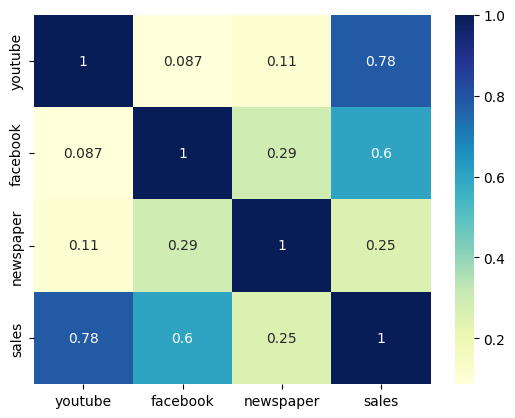

In [13]:
# Análise de Correlação entre investimento e plataforma de divulgação

sns.heatmap(MKT.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [14]:
MKT.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [15]:
# Definindo X e Y para análise de regressão

X = MKT[['youtube','facebook','newspaper']]
Y = MKT[['sales']]



In [16]:
# Chamando bibliotecas necessárias para aplicação do modelo e construção dos gráficos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Dividindo os dados entre treino e teste

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [17]:
# Treinando Modelo de Regressão Linear

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [57]:
# Fazendop previsões na base de teste

y_pred = lm.predict(X_test)

# Avaliando a performance do modelo

print(lm.intercept_)
print(lm.coef_)
r = r2_score(Y_test, y_pred)
print(r)


[3.6659818]
[[ 4.52186897e-02  1.88062758e-01 -1.35618526e-04]]
0.882423505618885


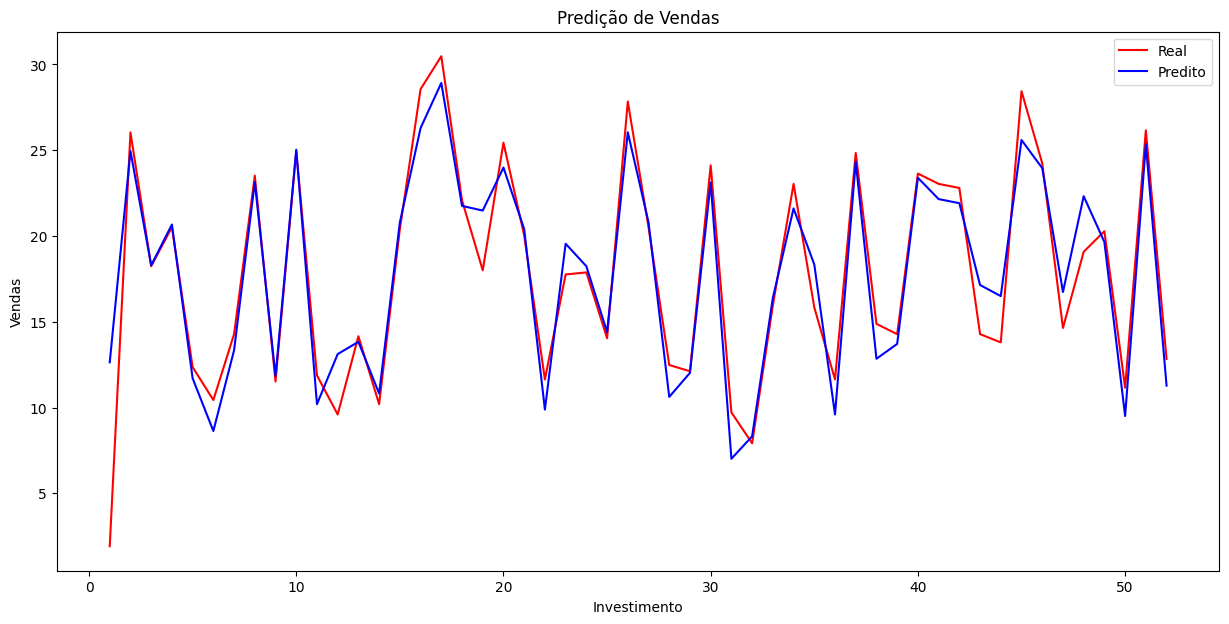

In [60]:
# Grafico do modelo de predição

c = [i for i in range(1,Y_test.shape[0]+1,1)]

fig = plt.figure(figsize=(15,7));

plt.plot(c, Y_test, color="red");
plt.plot(c, y_pred, color="blue");
plt.xlabel("Investimento");
plt.ylabel("Vendas");
plt.title("Predição de Vendas");
plt.legend(["Real", "Predito"]);
plt.show()
